**Problem Statement:** Objective of the work is to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

In [1]:
import os
os.getcwd()

'D:\\Learnbay Datascience\\Self Projects\\Banking Domain\\Home Loan Approval Data'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading train and test data
train_df = pd.read_csv("loan_train.csv")
test_df = pd.read_csv("loan_test.csv")

In [4]:
print(train_df.head())
print("************************************"*7)
print(test_df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
print(train_df.shape)
print(test_df.shape)

(614, 13)
(367, 12)


In [6]:
print(train_df.describe())
print("************************************"*7)
print(test_df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
************************************************************************************************************

In [7]:
print(train_df.info())
print("************************************"*7)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
***********************************************************************************************************

In [8]:
print(train_df.isnull().sum())
print("************************************"*7)
print(test_df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
************************************************************************************************************************************************************************************************************************************************************
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [9]:
print(train_df.nunique())
print("************************************"*7)
print(test_df.nunique())

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64
************************************************************************************************************************************************************************************************************************************************************
Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64


In [10]:
print(set(train_df['Gender'].values.tolist()))
print(set(train_df['Married'].values.tolist()))
print(set(train_df['Dependents'].values.tolist()))
print(set(train_df['Education'].values.tolist()))
print(set(train_df['Self_Employed'].values.tolist()))
print(set(train_df['Property_Area'].values.tolist()))
print(set(train_df['Loan_Status'].values.tolist()))

{nan, 'Male', 'Female'}
{nan, 'Yes', 'No'}
{nan, '0', '1', '3+', '2'}
{'Graduate', 'Not Graduate'}
{nan, 'Yes', 'No'}
{'Semiurban', 'Urban', 'Rural'}
{'Y', 'N'}


In [11]:
print(set(test_df['Gender'].values.tolist()))
print(set(test_df['Married'].values.tolist()))
print(set(test_df['Dependents'].values.tolist()))
print(set(test_df['Education'].values.tolist()))
print(set(test_df['Self_Employed'].values.tolist()))
print(set(test_df['Property_Area'].values.tolist()))

{nan, 'Male', 'Female'}
{'Yes', 'No'}
{nan, '0', '1', '3+', '2'}
{'Graduate', 'Not Graduate'}
{nan, 'Yes', 'No'}
{'Semiurban', 'Urban', 'Rural'}


In [12]:
cat_cols=['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in cat_cols:
    train_df[col].fillna(train_df[col].mode()[0],inplace=True)
    test_df[col].fillna(test_df[col].mode()[0],inplace=True)

In [13]:
print(train_df.isnull().sum())
print("************************************"*7)
print(test_df.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64
************************************************************************************************************************************************************************************************************************************************************
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64


<AxesSubplot: >

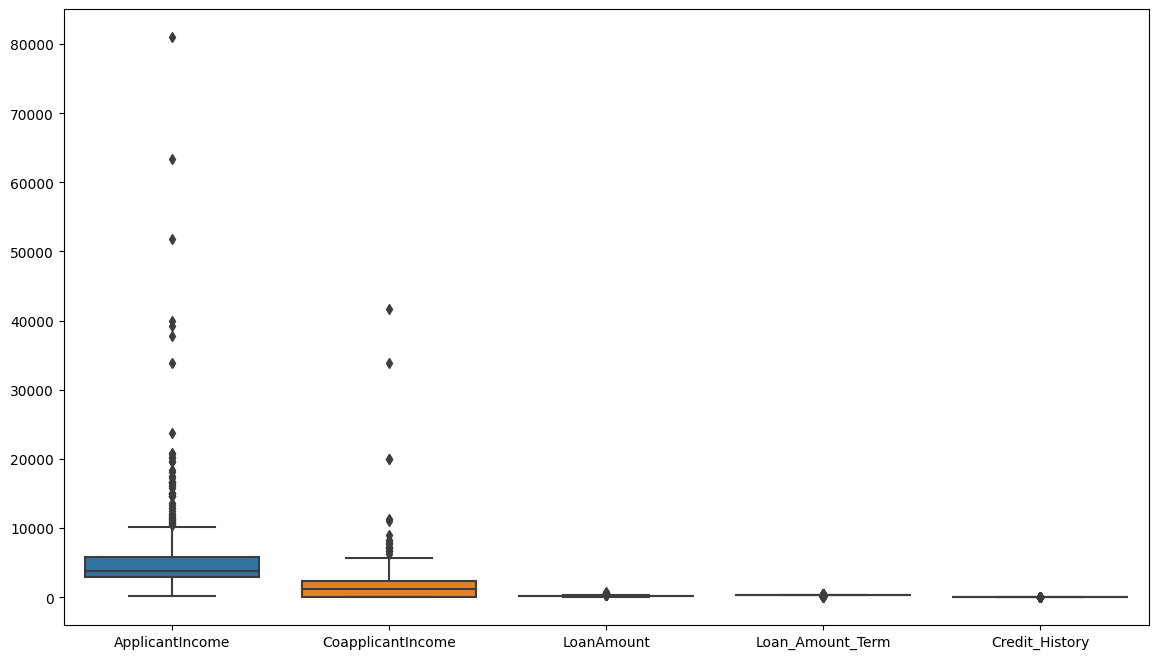

In [14]:
plt.figure(figsize=(14,8))
sns.boxplot(train_df)

<AxesSubplot: >

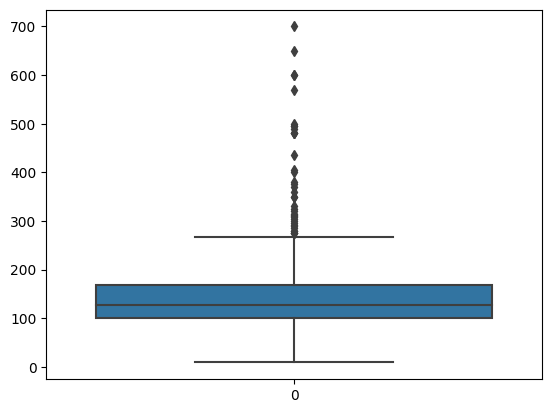

In [15]:
sns.boxplot(train_df['LoanAmount'])

<AxesSubplot: >

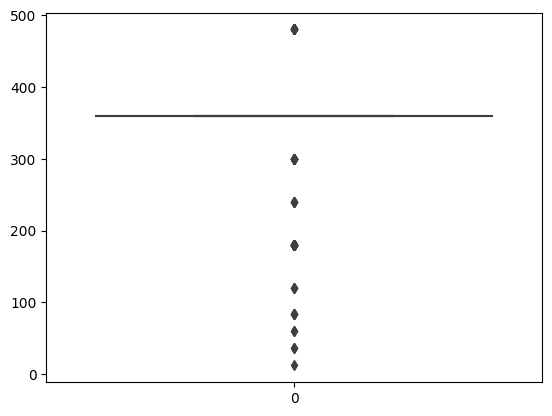

In [16]:
sns.boxplot(train_df['Loan_Amount_Term'])

In [17]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
train_df['Loan_Amount_Term'].mean()

342.0

In [19]:
train_df['Loan_Amount_Term'].median()

360.0

In [20]:
train_df['LoanAmount'].mean()

146.41216216216216

In [21]:
train_df['LoanAmount'].median()

128.0

<AxesSubplot: >

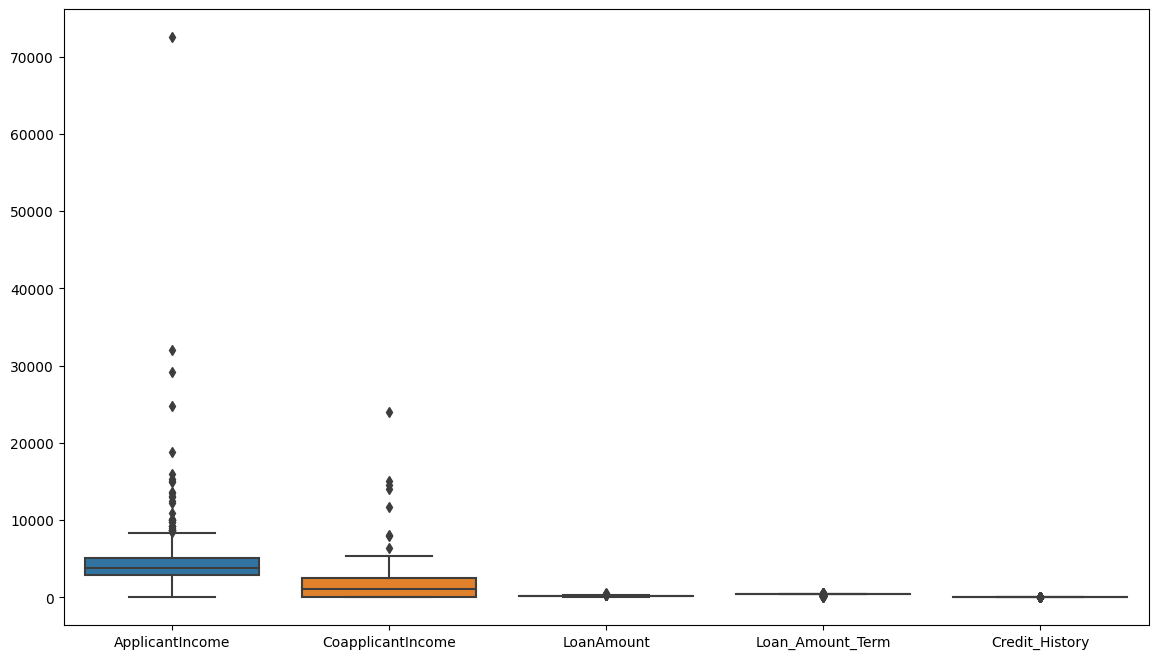

In [22]:
plt.figure(figsize=(14,8))
sns.boxplot(test_df)

In [23]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())

In [24]:
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median())

In [25]:
print(train_df.isnull().sum())
print("************************************"*7)
print(test_df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
************************************************************************************************************************************************************************************************************************************************************
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [26]:
target_map={"Y":1, "N": 0}
dataset=[train_df]
for data in dataset:
    data['Loan_Status']=data['Loan_Status'].map(target_map)

In [27]:
gender_map={"Male": 1,"Female": 0}
marry_map={"Yes":1,"No":0}
education_map={"Graduate": 1,"Not Graduate":0}
property_map={"Semiurban":2,"Urban":1,"Rural":0}
dataset=[train_df]
for data in dataset:
    data['Gender']=data['Gender'].map(gender_map)
    data['Married']=data['Married'].map(marry_map)
    data['Self_Employed']=data['Self_Employed'].map(marry_map)
    data['Education']=data['Education'].map(education_map)
    data['Property_Area']=data['Property_Area'].map(property_map)

In [28]:
#dependents contains numeric value except 3+, so we just need to replace 3+ with 3 and then  convert their type to numeric
train_df = train_df.replace({'Dependents': '3+'}, {'Dependents': 3})
train_df['Dependents'] = train_df['Dependents'].astype('int64')

In [29]:
train_df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [31]:
train_df = train_df.drop('Loan_ID', axis=1)

In [32]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [33]:
# split dependent & independent var
X = train_df.iloc[:,:-1]
y = train_df['Loan_Status']

In [34]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1


In [35]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [36]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,0.472343,-1.372089,-0.737806,0.528362,-0.392601,0.072991,-0.554487,-0.211241,0.273231,0.411733,-0.107989
1,0.472343,0.728816,0.253470,0.528362,-0.392601,-0.134412,-0.038732,-0.211241,0.273231,0.411733,-1.335861
2,0.472343,0.728816,-0.737806,0.528362,2.547117,-0.393747,-0.554487,-0.948996,0.273231,0.411733,-0.107989
3,0.472343,0.728816,-0.737806,-1.892641,-0.392601,-0.462062,0.251980,-0.306435,0.273231,0.411733,-0.107989
4,0.472343,-1.372089,-0.737806,0.528362,-0.392601,0.097728,-0.554487,-0.056551,0.273231,0.411733,-0.107989
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,0.528362,-0.392601,-0.410130,-0.554487,-0.889500,0.273231,0.411733,-1.335861
610,0.472343,0.728816,2.236021,0.528362,-0.392601,-0.212557,-0.554487,-1.258378,-2.522836,0.411733,-1.335861
611,0.472343,0.728816,0.253470,0.528362,-0.392601,0.437174,-0.472404,1.276168,0.273231,0.411733,-0.107989
612,0.472343,0.728816,1.244745,0.528362,-0.392601,0.357064,-0.554487,0.490816,0.273231,0.411733,-0.107989


In [38]:
gender_map={"Male": 1,"Female": 0}
marry_map={"Yes":1,"No":0}
education_map={"Graduate": 1,"Not Graduate":0}
property_map={"Semiurban":2,"Urban":1,"Rural":0}
dataset=[test_df]
for data in dataset:
    data['Gender']=data['Gender'].map(gender_map)
    data['Married']=data['Married'].map(marry_map)
    data['Self_Employed']=data['Self_Employed'].map(marry_map)
    data['Education']=data['Education'].map(education_map)
    data['Property_Area']=data['Property_Area'].map(property_map)

In [39]:
#dependents contains numeric value except 3+, so we just need to replace 3+ with 3 and then  convert their type to numeric
test_df = test_df.replace({'Dependents': '3+'}, {'Dependents': 3})
test_df['Dependents'] = test_df['Dependents'].astype('int64')

test_df = test_df.drop('Loan_ID', axis=1)

test_scaled = scaler.fit_transform(test_df)

pd.DataFrame(test_scaled)

In [40]:
# Building models
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=np.random.randint(0,100))

In [42]:
svm_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': range(1,11)}
svm = SVC()
svm_random = RandomizedSearchCV(estimator = svm, param_distributions = svm_param_grid, n_iter = 100, 
                                scoring = 'accuracy', cv=6)
svm_random.fit(X_train, y_train)
y_pred_svm = svm_random.predict(X_test)
print("Best Params :", svm_random.best_params_)

print('SVM Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, y_pred_svm))
print('F1 Score        : ', metrics.f1_score(y_test, y_pred_svm))
print('Precision       : ', metrics.precision_score(y_test, y_pred_svm))
print('Recall          : ', metrics.recall_score(y_test, y_pred_svm))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Best Params : {'kernel': 'linear', 'C': 1}
SVM Performance with Balancing:
---------------------------------
Accuracy        :  0.745945945945946
F1 Score        :  0.8395904436860069
Precision       :  0.7365269461077845
Recall          :  0.9761904761904762
Confusion Matrix:
  [[ 15  44]
 [  3 123]]
              precision    recall  f1-score   support

           0       0.83      0.25      0.39        59
           1       0.74      0.98      0.84       126

    accuracy                           0.75       185
   macro avg       0.78      0.62      0.61       185
weighted avg       0.77      0.75      0.70       185



In [43]:
# checking train accuracy of svm
y_pred_train_svm = svm_random.predict(X_train)

In [44]:
metrics.accuracy_score(y_train,y_pred_train_svm)

0.8368298368298368

In [45]:
y.value_counts(normalize=True)
# we can see the classes are imbalance 

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [46]:
rf_param_grid = {
    'n_estimators': (1,1000,100)
    }
rf = RandomForestClassifier()
rf_random =  RandomizedSearchCV(param_distributions=rf_param_grid, estimator=rf, n_iter=100, 
                                scoring='accuracy', cv=5)
rf_random.fit(X_train,y_train)
y_pred_rf = rf_random.predict(X_test)
print("Best Params :", rf_random.best_params_)

print('Random Forest Performance without Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, y_pred_rf))
print('F1 Score        : ', metrics.f1_score(y_test, y_pred_rf))
print('Precision       : ', metrics.precision_score(y_test, y_pred_rf))
print('Recall          : ', metrics.recall_score(y_test, y_pred_rf))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Best Params : {'n_estimators': 100}
Random Forest Performance without Balancing:
---------------------------------
Accuracy        :  0.7243243243243244
F1 Score        :  0.8235294117647058
Precision       :  0.7300613496932515
Recall          :  0.9444444444444444
Confusion Matrix:
  [[ 15  44]
 [  7 119]]
              precision    recall  f1-score   support

           0       0.68      0.25      0.37        59
           1       0.73      0.94      0.82       126

    accuracy                           0.72       185
   macro avg       0.71      0.60      0.60       185
weighted avg       0.71      0.72      0.68       185



In [47]:
dt_param_grid = {'max_depth': range(4,25),
    'min_samples_leaf': range(10,100,10),
    'min_samples_split': range(10,100,10),
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_param_grid, cv=5, return_train_score=True)
dt_grid.fit(X_train,y_train)
y_pred_dt = dt_grid.predict(X_test)
print("Best Params :", dt_grid.best_params_)

print('Decision Tree Performance without Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, y_pred_dt))
print('F1 Score        : ', metrics.f1_score(y_test, y_pred_dt))
print('Precision       : ', metrics.precision_score(y_test, y_pred_dt))
print('Recall          : ', metrics.recall_score(y_test, y_pred_dt))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Best Params : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 80}
Decision Tree Performance without Balancing:
---------------------------------
Accuracy        :  0.745945945945946
F1 Score        :  0.8395904436860069
Precision       :  0.7365269461077845
Recall          :  0.9761904761904762
Confusion Matrix:
  [[ 15  44]
 [  3 123]]
              precision    recall  f1-score   support

           0       0.83      0.25      0.39        59
           1       0.74      0.98      0.84       126

    accuracy                           0.75       185
   macro avg       0.78      0.62      0.61       185
weighted avg       0.77      0.75      0.70       185



In [52]:
# Balancing the model using SMOTE technique
X_train1 = X_train.copy()
y_train1 = y_train.copy()

In [53]:
from imblearn.over_sampling import SMOTE
smot = SMOTE(sampling_strategy='not majority')
X_smot, y_smot = smot.fit_resample(X_train1,y_train1)

In [54]:
print("Before Oversampling count of label '0':", y_train1.value_counts()[0])
print("Before Oversampling count of label '1':", y_train1.value_counts()[1])

Before Oversampling count of label '0': 133
Before Oversampling count of label '1': 296


In [55]:
print("After Oversampling count of label '0':", y_smot.value_counts()[0])
print("After Oversampling count of label '1':", y_smot.value_counts()[1])

After Oversampling count of label '0': 296
After Oversampling count of label '1': 296


In [56]:
print("Before Oversampling shape of X :", X_train1.shape)
print("After Oversampling shape of X :", X_smot.shape)

Before Oversampling shape of X : (429, 11)
After Oversampling shape of X : (592, 11)


In [57]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_smot, y_smot, test_size=0.3, random_state=4)

In [58]:
X_train2

array([[ 0.47234264,  0.72881553, -0.73780632, ...,  0.2732313 ,
         0.41173269, -1.33586108],
       [ 0.47234264,  0.72881553,  0.25346957, ..., -2.52283563,
         0.41173269, -0.10798877],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
        -2.42876026, -0.10798877],
       ...,
       [ 0.47234264, -1.37208932, -0.73780632, ...,  2.13727592,
         0.41173269,  0.04786201],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.41173269, -1.33586108],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.2732313 ,
         0.41173269, -1.33586108]])

In [59]:
# SVM after SMOTE
svm1 = SVC(C=1.0, kernel='poly')
svm1.fit(X_train2, y_train2)
y_pred_svm1 = svm1.predict(X_test2)

print('SVM Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test2, y_pred_svm1))
print('F1 Score        : ', metrics.f1_score(y_test2, y_pred_svm1))
print('Precision       : ', metrics.precision_score(y_test2, y_pred_svm1))
print('Recall          : ', metrics.recall_score(y_test2, y_pred_svm1))
print('Confusion Matrix:\n ', confusion_matrix(y_test2, y_pred_svm1))
print(classification_report(y_test2, y_pred_svm1))

SVM Performance with Balancing:
---------------------------------
Accuracy        :  0.7921348314606742
F1 Score        :  0.8159203980099502
Precision       :  0.7068965517241379
Recall          :  0.9647058823529412
Confusion Matrix:
  [[59 34]
 [ 3 82]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76        93
           1       0.71      0.96      0.82        85

    accuracy                           0.79       178
   macro avg       0.83      0.80      0.79       178
weighted avg       0.83      0.79      0.79       178



In [79]:
rfm1 = RandomForestClassifier(max_depth=14, random_state=0, n_estimators=40, min_samples_split=1,
    min_samples_leaf=1)
rfm1.fit(X_train2, y_train2)
y_pred_rfm1 = rfm1.predict(X_test2)

print('Random Forest Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test2, y_pred_rfm1))
print('F1 Score        : ', metrics.f1_score(y_test2, y_pred_rfm1))
print('Precision       : ', metrics.precision_score(y_test2, y_pred_rfm1))
print('Recall          : ', metrics.recall_score(y_test2, y_pred_rfm1))
print('Confusion Matrix:\n ', confusion_matrix(y_test2, y_pred_rfm1))
print(classification_report(y_test2, y_pred_rfm1))

Random Forest Performance with Balancing:
---------------------------------
Accuracy        :  0.8314606741573034
F1 Score        :  0.8387096774193548
Precision       :  0.7722772277227723
Recall          :  0.9176470588235294
Confusion Matrix:
  [[70 23]
 [ 7 78]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        93
           1       0.77      0.92      0.84        85

    accuracy                           0.83       178
   macro avg       0.84      0.84      0.83       178
weighted avg       0.84      0.83      0.83       178



In [61]:
dtm1 = DecisionTreeClassifier(max_depth=15, random_state=0, min_samples_split=1,
    min_samples_leaf=1)
dtm1.fit(X_train2, y_train2)
y_pred_dtm1 = dtm1.predict(X_test2)

print('SVM Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test2, y_pred_dtm1))
print('F1 Score        : ', metrics.f1_score(y_test2, y_pred_dtm1))
print('Precision       : ', metrics.precision_score(y_test2, y_pred_dtm1))
print('Recall          : ', metrics.recall_score(y_test2, y_pred_dtm1))
print('Confusion Matrix:\n ', confusion_matrix(y_test2, y_pred_dtm1))
print(classification_report(y_test2, y_pred_dtm1))

SVM Performance with Balancing:
---------------------------------
Accuracy        :  0.8258426966292135
F1 Score        :  0.822857142857143
Precision       :  0.8
Recall          :  0.8470588235294118
Confusion Matrix:
  [[75 18]
 [13 72]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        93
           1       0.80      0.85      0.82        85

    accuracy                           0.83       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.83      0.83      0.83       178



In [62]:
lrm1 = LogisticRegression(C=10, max_iter=50, n_jobs=4)
lrm1.fit(X_train2,y_train2)
y_pred_lrm1 = lrm1.predict(X_test2)

print('Logistic Regression Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test2, y_pred_lrm1))
print('F1 Score        : ', metrics.f1_score(y_test2, y_pred_lrm1))
print('Precision       : ', metrics.precision_score(y_test2, y_pred_lrm1))
print('Recall          : ', metrics.recall_score(y_test2, y_pred_lrm1))
print('Confusion Matrix:\n ', confusion_matrix(y_test2, y_pred_lrm1))
print(classification_report(y_test2, y_pred_lrm1))

Logistic Regression Performance with Balancing:
---------------------------------
Accuracy        :  0.7359550561797753
F1 Score        :  0.7614213197969542
Precision       :  0.6696428571428571
Recall          :  0.8823529411764706
Confusion Matrix:
  [[56 37]
 [10 75]]
              precision    recall  f1-score   support

           0       0.85      0.60      0.70        93
           1       0.67      0.88      0.76        85

    accuracy                           0.74       178
   macro avg       0.76      0.74      0.73       178
weighted avg       0.76      0.74      0.73       178



Credit_History       0.313832
ApplicantIncome      0.169571
LoanAmount           0.148432
Dependents           0.140847
CoapplicantIncome    0.094035
Loan_Amount_Term     0.033456
Married              0.027547
Property_Area        0.023747
Self_Employed        0.021209
Education            0.014324
Gender               0.013002
dtype: float64


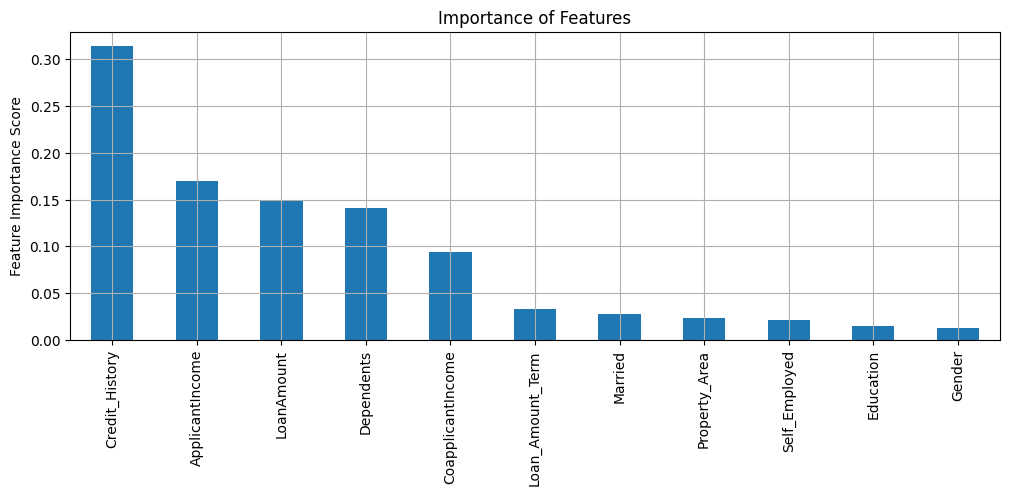

In [63]:
feat_imp = pd.Series(dtm1.feature_importances_, list(X)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print(feat_imp)
plt.grid()
plt.show()

Credit_History       0.295169
ApplicantIncome      0.155060
LoanAmount           0.152998
CoapplicantIncome    0.099826
Dependents           0.088623
Property_Area        0.069234
Married              0.041461
Loan_Amount_Term     0.032700
Education            0.027831
Self_Employed        0.021572
Gender               0.015525
dtype: float64


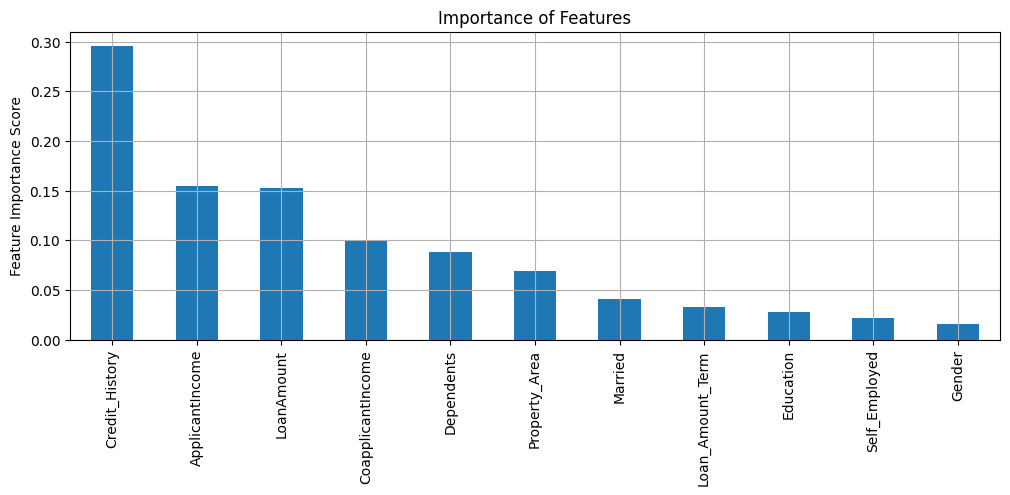

In [65]:
feat_imp = pd.Series(rfm1.feature_importances_, list(X)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print(feat_imp)
plt.grid()
plt.show()

In [66]:
loanID=test_df['Loan_ID']
test_df=test_df.drop('Loan_ID',1)

In [73]:
# Let's predict the results for test file and store in csv file
y_pred_d=rfm1.predict(test_df)
y_final=[]
for y in y_pred_d:
    if y==1:
        y_final.append("Y")
    elif y==0:
        y_final.append("N")
y_best=np.array(y_final)
type(y_best)

numpy.ndarray

In [74]:
submission = pd.DataFrame({
        "Loan_ID": loanID,
        "Loan_Status": y_best
    })
submission.head(15)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
5,LP001054,N
6,LP001055,N
7,LP001056,Y
8,LP001059,Y
9,LP001067,N


In [75]:
y_pred_d

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

We have got the best accuracy from Random Forest as well as F-1 score.
- Best 3 features it has considered for prediction is Credit History, Income and Loan Amount of the applicant.
- i.e applicant with good credit history, income and more loan amount have been sanctioned with the loan

A credit score is a number from 300 to 850 that depicts a consumer's creditworthiness. Factors considered in credit scoring include repayment history, types of loans, length of credit history, and an individual's total debt.

A credit score is a prediction of your credit behavior, such as how likely you are to pay a loan back on time, based on information from your credit reports.

A low credit score becomes an obstacle for borrowers to avail desired loan amounts at a low-interest rate. However, users can purchase their CIBIL report. From your CIBIL report, you can check your CIBIL score whenever you want. For that, you have to follow some steps.
A CIBIL report contains your credit history as given by the financial institutions and banks. Also, you can get access to your CIBIL score and other financial behavior. To avail of your CIBIL report, a user needs to take a subscription. Credit rating agencies facilitate different subscription packages for users. Make a subscription request to the respective agency, and they will send you a mail.

Generally, a CIBIL Score in the range of 700-749 is considered a good CIBIL Score according to TransUnion CIBIL. With this score, you can qualify for credit offers from different banks and NBFCs. You can check your CIBIL Score anytime you want with the Credit Pass. Checking your score regularly has no impact on your score.

Highlights:

- Credit scores are three-digit numbers designed to represent the likelihood you will pay your bills on time.
- There's no “magic number” that guarantees you loan approval or better interest rates and terms.
- Credit ranges vary based on the scoring model used to evaluate them.

Potential lenders and creditors look at your credit score as one factor when deciding whether to offer you new credit. Lenders may also use your credit score to set the interest rates and other terms for any credit they offer.

Credit scores typically range from 300 to 850. Within that range, scores can usually be placed into one of five categories: poor, fair, good, very good and excellent.

Credit score ranges – what are they?

There's more than one credit scoring model available and more than one range of scores. However, most credit score ranges are similar to the following:

- 800 to 850: (Excellent)
Individuals in this range are considered to be low-risk borrowers. They may have an easier time securing a loan than borrowers with lower scores.
- 740 to 799: (Very good)
Individuals in this range have demonstrated a history of positive credit behavior and may have an easier time being approved for additional credit.
- 670 to 739: (Good)
Lenders generally view those with credit scores of 670 and up as acceptable or lower-risk borrowers.
- 580 to 669: (Fair)
Individuals in this category are often considered “subprime” borrowers. Lenders may consider them higher-risk, and they may have trouble qualifying for new credit.
- 300 to 579: (Poor)
Individuals in this range often have difficulty being approved for new credit. If you find yourself in the poor category, it's likely you'll need to take steps to improve your credit scores before you can secure any new credit.

How can I improve my credit scores?

The good news is your credit score is not a fixed number. With time and responsible choices, it can be improved. Just keep in mind that this process takes patience. This is especially true if you haven't kept the best credit habits in the past.

Some credit habits that could improve your score in the long term include making your payments on time, keeping old accounts open to lengthen your credit history and keeping your credit utilization rate low.

**Grid and RandomizedSearchCV**
- Model Hyperparameter tuning is very useful to enhance the performance of a machine learning model. We have discussed both the approaches to do the tuning that is GridSearchCV and RandomizedSeachCV. **The only difference between both the approaches is in grid search we define the combinations and do training of the model whereas in RandomizedSearchCV the model selects the combinations randomly. Both are very effective ways of tuning the parameters that increase the model generalizability.** 

**Is it easier to get approved for a smaller loan?**
- Small loans are easier to get approved for than large ones, because lenders aren't putting as much money at risk, and these loans can be paid back even if your income isn't very high. So figure out exactly how much money you need to accomplish your goals and apply for the minimum loan amount required.

In [80]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
model = BaggingClassifier()